# PyDTM Toolbox

This Notebook details how to use the PyDTM Python librairy to access [IOM's DTM API](https://dtm.iom.int/data-and-analysis/dtm-api) with python.

In [45]:
# Install packages
#!pip install -r env/requirements.txt

## Basic requests

The DTM API provides data at administrative levels: country, first sub-national level (admin 1), and second sub-national level (admin 2).

[More informations about administrative division levels here.](https://sedac.ciesin.columbia.edu/povmap/ds_defs_admin.jsp#:~:text=Administration%20Level%20Definitions&text=National%2Dlevel%20administrative%20boundary.,common%20political%20or%20administrative%20divisions.)




As a test, we are going to query all the data from Yemen between January and December 2023 for all 3 available admin levels.

### Country level

In [46]:
from src.api import countryLevelData
#help(countryLevelData)

In [69]:
# Test country level request with the minimum parameters required
response_country = countryLevelData(admin0Pcode="YEM", monthFrom_month= "1", monthFrom_year=2000, monthTo_month= "12", monthTo_year=2023)
#print(response_country.json())
print("Number of data points for selected area and period: ",len(response_country.json()['result']))

Number of data points for selected area and period:  19


### Admin 1 level

In [48]:
from src.api import admin1LevelData
#help(admin1LevelData)

In [70]:
# Test admin1 level request with the minimum parameters required
response_admin1 = admin1LevelData(admin0Pcode="YEM", monthFrom_month= "1", monthFrom_year=2000, monthTo_month= "12", monthTo_year=2023)
#print(response_admin1.json())
print("Number of data points for selected area and period: ",len(response_admin1.json()['result']))

Number of data points for selected area and period:  313


### Admin 2 level

In [50]:
from src.api import admin2LevelData
#help(admin2LevelData)

In [71]:
response_admin2 = admin2LevelData(admin0Pcode="YEM", monthFrom_month= "9", monthFrom_year=2018, monthTo_month= "12", monthTo_year=2023)
#print(response_admin2.json())
print("Number of data points for selected area and period: ",len(response_admin2.json()['result']))

Number of data points for selected area and period:  322


## Country codes

In the DTM API, country codes (admin0Pcodes) use the ISO3166 A-3 format. This section provides the list of country codes in that standard, as well as helper functions. 

[Country code source](https://gist.github.com/tadast/8827699).

In [52]:
import pandas as pd
from src.utils import ISO3166_A3ToCountry, countryToISO3166_A3, load_ISO3166_data

ISO3166_data = load_ISO3166_data()
ISO3166_data.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Åland Islands,"""AX""","""ALA""","""248""","""60.116667""","""19.9"""
2,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
3,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
4,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""


In [53]:
# Helper functions to convert between ISO3166_A3 and country name
print("FRA -> ",ISO3166_A3ToCountry("FRA"))
print("France -> ",countryToISO3166_A3("France"))

FRA ->  France
France ->  FRA


## Samples per countries

In this section, we use the `Geopandas` module to plot the number of samples

/var/folders/7x/jp5kfk9d6lgbyzrjfbtvtlwh0000gn/T/ipykernel_68723/437451144.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/7x/jp5kfk9d6lgbyzrjfbtvtlwh0000gn/T/ipykernel_68723/437451144.py:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world1 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/7x/jp5kfk9d6lgbyzrjfbtvtlwh0000gn/T/ipykernel_68723/437451144.py:45: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalea

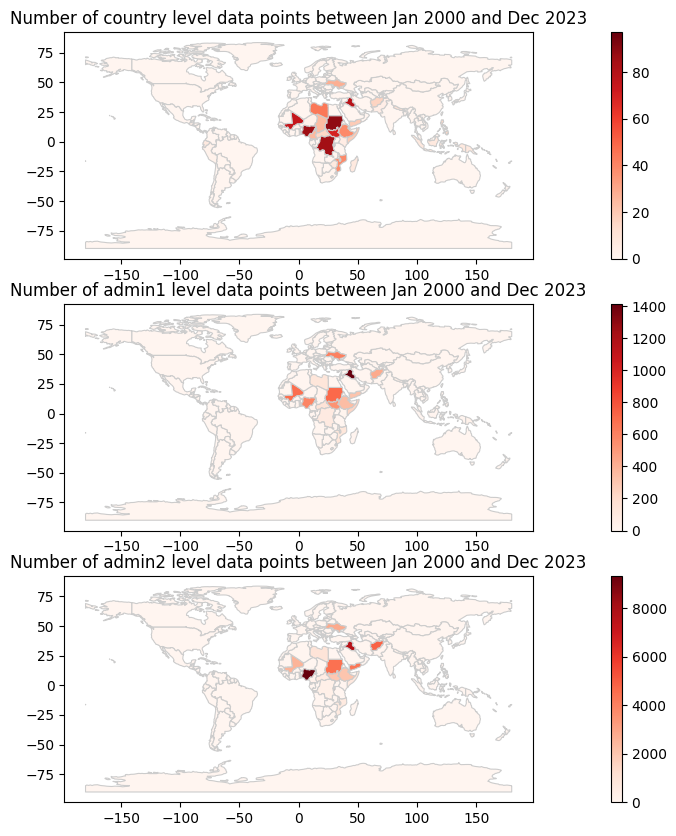

In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(20, 10))


# Read the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

for i in range(len(world)):
    country_id = world.loc[i]['iso_a3']
    response_country = countryLevelData(admin0Pcode=country_id, monthFrom_month= "1", monthFrom_year=2000, monthTo_month= "12", monthTo_year=2023)
    if response_country.status_code == 200:
        count_data_points = len(response_country.json()['result'])
    else:
        count_data_points = 0

    world.loc[i,'DataPoints'] = count_data_points

# Plot the heatmap
world.plot(column='DataPoints', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, ax = ax[0])

ax[0].set_title('Number of country level data points between Jan 2000 and Dec 2023')

# Read the world shapefile
world1 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

for i in range(len(world)):
    country_id = world.loc[i]['iso_a3']
    response_country = admin1LevelData(admin0Pcode=country_id, monthFrom_month= "1", monthFrom_year=2000, monthTo_month= "12", monthTo_year=2023)
    if response_country.status_code == 200:
        count_data_points = len(response_country.json()['result'])
    else:
        count_data_points = 0

    world1.loc[i,'DataPoints'] = count_data_points

# Plot the heatmap
world1.plot(column='DataPoints', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, ax = ax[1])

ax[1].set_title('Number of admin1 level data points between Jan 2000 and Dec 2023')


# Read the world shapefile
world2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

for i in range(len(world)):
    country_id = world.loc[i]['iso_a3']
    response_country = admin2LevelData(admin0Pcode=country_id, monthFrom_month= "1", monthFrom_year=2000, monthTo_month= "12", monthTo_year=2023)
    if response_country.status_code == 200:
        count_data_points = len(response_country.json()['result'])
    else:
        count_data_points = 0

    world2.loc[i,'DataPoints'] = count_data_points

# Plot the heatmap
world2.plot(column='DataPoints', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True, ax = ax[2])

ax[2].set_title('Number of admin2 level data points between Jan 2000 and Dec 2023')

# Show the plot
plt.show()